# Analyzing the effectiveness of subsidy models for token distribution

### Imports and global configurations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from datetime import datetime
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

from metadata_small import metadata

### Data collection and preparation

Data Sources:
Files that worked with the data:

### Data connection

In [2]:
tvl_df = pd.read_csv('final_data/tvl_data.csv')
tvl_df = tvl_df.set_index('Project')
metadata_df = pd.DataFrame.from_dict(metadata, orient='index')
metadata_df.index.name = 'Project'

In [3]:
tvl_df.head(15)

,seven_day_tvl,thirty_day_tvl,hundred_day_tvl
Project,,,
arbitrum,6.795061,5.820428,2.871549
dydx,11.168143,101.752359,170.277729
optimism,28.613792,6.383093,205.419462
uniswap,106.017945,211.869598,102.142041
zksync era,-0.157270,-16.429724,-16.933565
eigenlayer,-0.017694,29.792661,6.946306
aptos,596.254278,965.917078,1555.179136
velodrome,71.038082,-49.111998,131.765415
sei,22.977870,47.825605,47.825605


In [4]:
metadata_df.head(15)

,coingecko_handle,date,claimers,alloc_size,market,multiphase,type
Project,,,,,,,
arbitrum,arbitrum,2023-03-23,583138,11.62,1,0,chain
dydx,dydx-chain,2021-09-08,47136,15.37,1,0,protocol
optimism,optimism,2022-05-31,248699,3.83,0,1,chain
uniswap,uniswap,2020-09-16,252803,15.00,1,0,protocol
zksync era,zksync,2024-06-17,695232,17.50,1,0,chain
eigenlayer,eigenlayer,2024-05-10,198384,5.00,1,1,protocol
aptos,aptos,2022-10-21,124830,2.13,0,0,chain
velodrome,velodrome-finance,2022-06-01,13938,60.00,0,0,protocol
sei,sei-network,2024-07-04,44445,0.34,1,1,chain


In [5]:
merged_df = pd.merge(metadata_df, tvl_df, on='Project', how='left')

In [6]:
merged_df.head(15)

,coingecko_handle,date,claimers,alloc_size,market,multiphase,type,seven_day_tvl,thirty_day_tvl,hundred_day_tvl
Project,,,,,,,,,,
arbitrum,arbitrum,2023-03-23,583138,11.62,1,0,chain,6.795061,5.820428,2.871549
dydx,dydx-chain,2021-09-08,47136,15.37,1,0,protocol,11.168143,101.752359,170.277729
optimism,optimism,2022-05-31,248699,3.83,0,1,chain,28.613792,6.383093,205.419462
uniswap,uniswap,2020-09-16,252803,15.00,1,0,protocol,106.017945,211.869598,102.142041
zksync era,zksync,2024-06-17,695232,17.50,1,0,chain,-0.157270,-16.429724,-16.933565
eigenlayer,eigenlayer,2024-05-10,198384,5.00,1,1,protocol,-0.017694,29.792661,6.946306
aptos,aptos,2022-10-21,124830,2.13,0,0,chain,596.254278,965.917078,1555.179136
velodrome,velodrome-finance,2022-06-01,13938,60.00,0,0,protocol,71.038082,-49.111998,131.765415
sei,sei-network,2024-07-04,44445,0.34,1,1,chain,22.977870,47.825605,47.825605


In [7]:
price_df = pd.read_csv('final_data/price_data.csv')
price_df = price_df.set_index('Project')
print(price_df.head(15))

                           date  seven_day_price  thirty_day_price  \
Project                                                              
arbitrum    2023-03-23 14:01:26        -5.096243          0.705967   
dydx        2023-10-31 09:13:09              NaN         29.295367   
optimism    2022-06-01 01:24:35       -51.017675        -57.037010   
uniswap     2020-09-17 04:05:06        52.011702         -9.268136   
zksync-era  2024-06-17 09:22:48       -24.306958        -27.899263   
eigenlayer                  NaN              NaN               NaN   
aptos       2022-10-19 03:02:25        25.359139        -32.432770   
velodrome   2022-06-03 01:49:54       -67.472377        -87.024986   
sei         2023-08-15 14:04:52       -39.186639               NaN   
starknet    2024-02-20 13:05:13         4.891054          9.359653   
jupiter     2024-01-31 16:02:47       -11.806490         -4.578192   
ethena      2024-04-02 09:46:06        64.163428         -6.402907   
ether.fi    2024-03-

In [8]:
#merged_df.set_index('Project', inplace=True)
merged_df = pd.merge(merged_df, price_df, on='Project', how='left')
merged_df.head(15)

,coingecko_handle,date_x,claimers,alloc_size,market,multiphase,type,seven_day_tvl,thirty_day_tvl,hundred_day_tvl,date_y,seven_day_price,thirty_day_price,hundred_day_price
Project,,,,,,,,,,,,,,
arbitrum,arbitrum,2023-03-23,583138,11.62,1,0,chain,6.795061,5.820428,2.871549,2023-03-23 14:01:26,-5.096243,0.705967,-20.823904
dydx,dydx-chain,2021-09-08,47136,15.37,1,0,protocol,11.168143,101.752359,170.277729,2023-10-31 09:13:09,NaN,29.295367,17.941092
optimism,optimism,2022-05-31,248699,3.83,0,1,chain,28.613792,6.383093,205.419462,2022-06-01 01:24:35,-51.017675,-57.037010,12.507271
uniswap,uniswap,2020-09-16,252803,15.00,1,0,protocol,106.017945,211.869598,102.142041,2020-09-17 04:05:06,52.011702,-9.268136,3.313128
zksync era,zksync,2024-06-17,695232,17.50,1,0,chain,-0.157270,-16.429724,-16.933565,NaN,NaN,NaN,NaN
eigenlayer,eigenlayer,2024-05-10,198384,5.00,1,1,protocol,-0.017694,29.792661,6.946306,NaN,NaN,NaN,NaN
aptos,aptos,2022-10-21,124830,2.13,0,0,chain,596.254278,965.917078,1555.179136,2022-10-19 03:02:25,25.359139,-32.432770,NaN
velodrome,velodrome-finance,2022-06-01,13938,60.00,0,0,protocol,71.038082,-49.111998,131.765415,2022-06-03 01:49:54,-67.472377,-87.024986,-43.477467
sei,sei-network,2024-07-04,44445,0.34,1,1,chain,22.977870,47.825605,47.825605,2023-08-15 14:04:52,-39.186639,NaN,-2.864999


In [9]:
merged_df.to_csv('final_data/merged.csv')

## Data Visualization

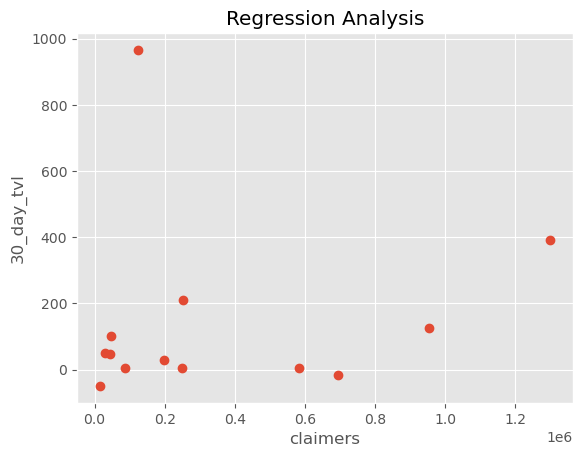

In [14]:
plt.plot(merged_df['claimers'], merged_df['thirty_day_tvl'], 'o')  
    
# naming the x axis  
plt.xlabel('claimers')  
# naming the y axis  
plt.ylabel('30_day_tvl')  
    
# giving a title to my graph  
plt.title('Regression Analysis')  
    
# function to show the plot  
plt.show() 

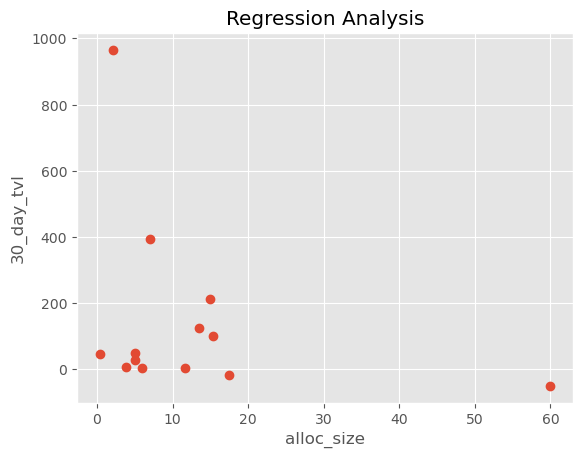

In [16]:
plt.plot(merged_df['alloc_size'], merged_df['thirty_day_tvl'], 'o')  
    
# naming the x axis  
plt.xlabel('alloc_size')  
# naming the y axis  
plt.ylabel('30_day_tvl')  
    
# giving a title to my graph  
plt.title('Regression Analysis')  
    
# function to show the plot  
plt.show() 

In [19]:
seven_day_tvl_regression_df = merged_df[['claimers', 'alloc_size', 'market', 'multiphase', 'seven_day_tvl']]

c:\Users\pierr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


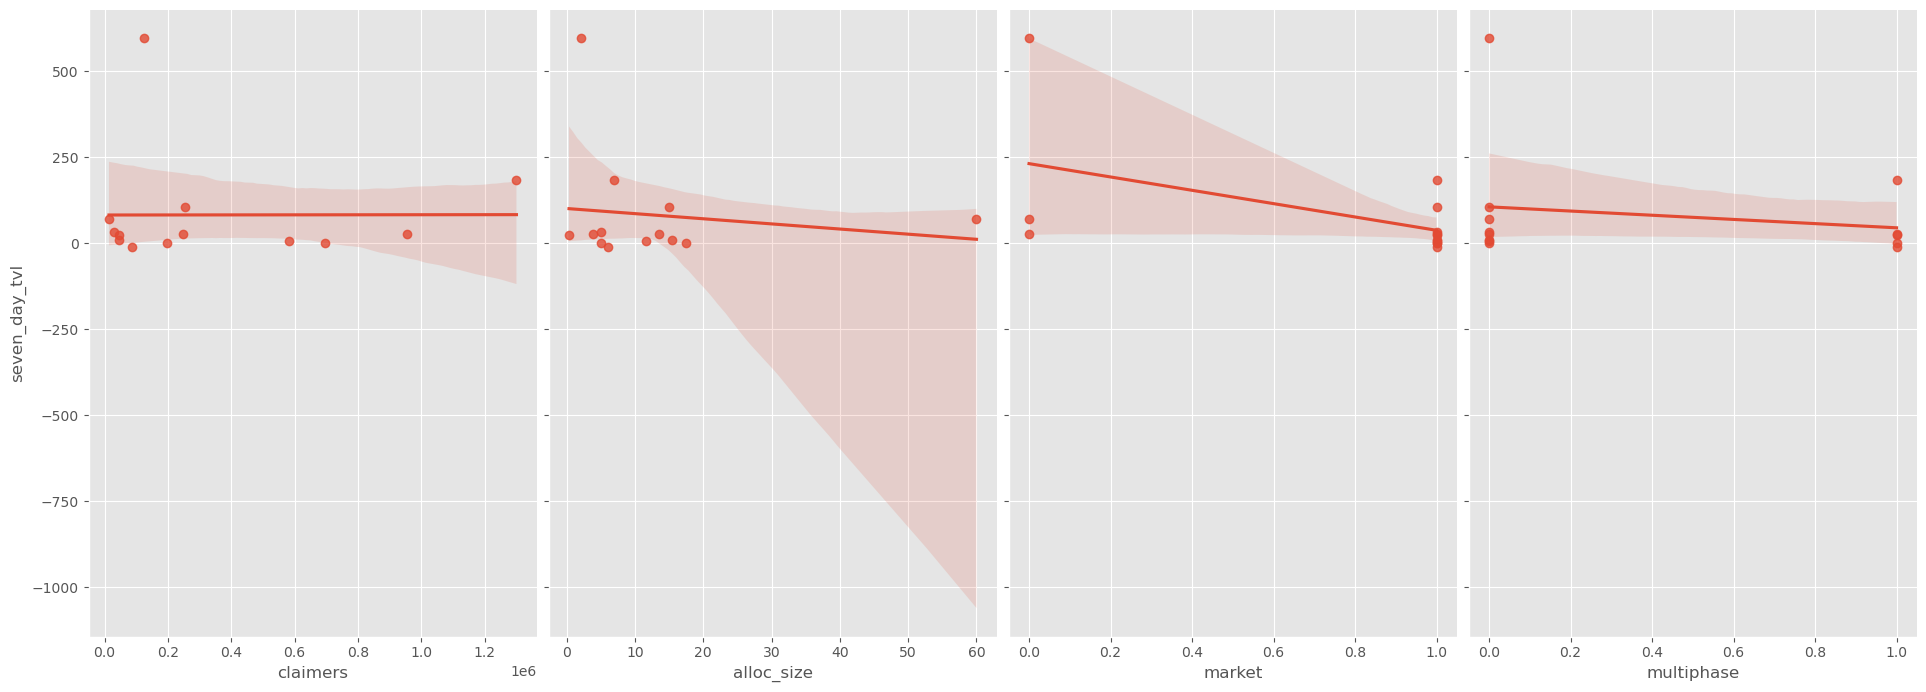

In [20]:
sns.pairplot(seven_day_tvl_regression_df, x_vars=['claimers', 'alloc_size', 'market', 'multiphase'], y_vars='seven_day_tvl', height=7, aspect=0.7, kind='reg')

c:\Users\pierr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


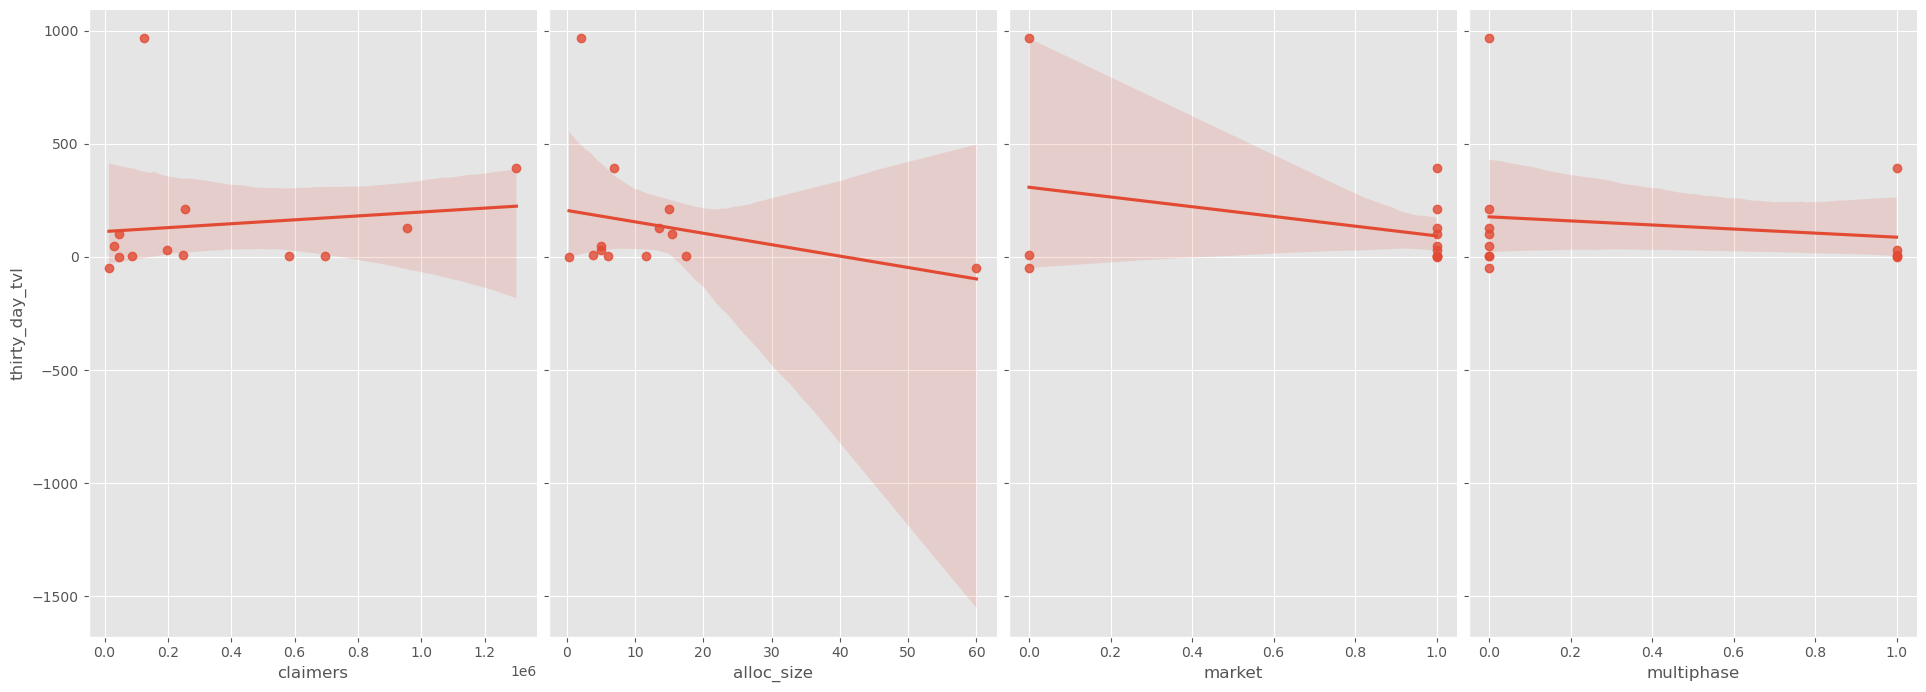

In [ ]:
sns.pairplot(merged_df, x_vars=['claimers', 'alloc_size', 'market', 'multiphase'], y_vars='thirty_day_tvl', height=7, aspect=0.7, kind='reg')

c:\Users\pierr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


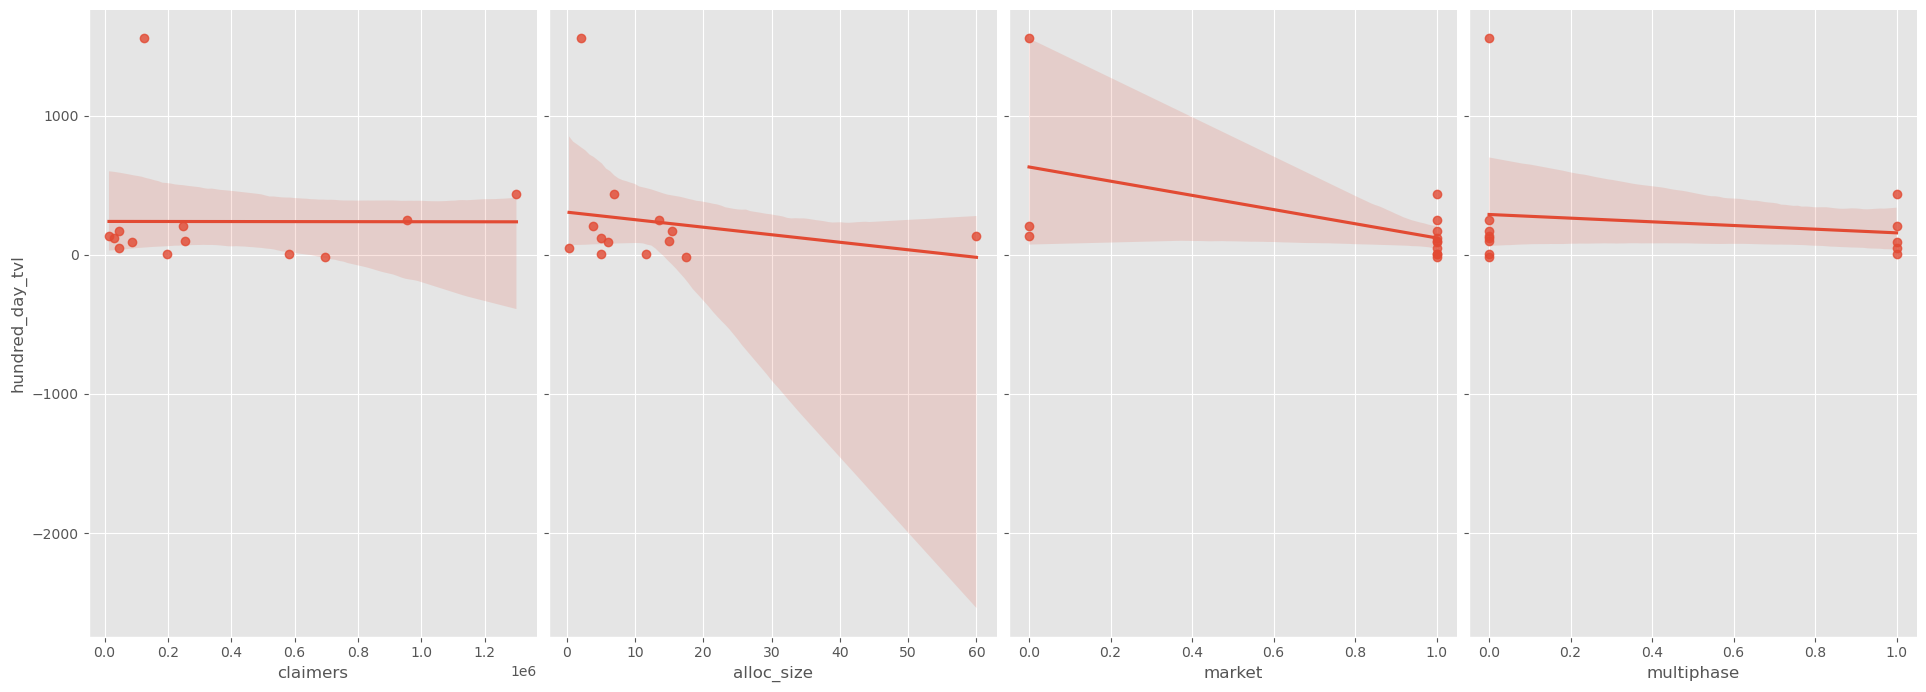

In [21]:
sns.pairplot(merged_df, x_vars=['claimers', 'alloc_size', 'market', 'multiphase'], y_vars='hundred_day_tvl', height=7, aspect=0.7, kind='reg')

bei binären daten eventuell logistische regression --> nachschauen
eventuell auch variablen entfernen, je nach dem wie gut es performed 

c:\Users\pierr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


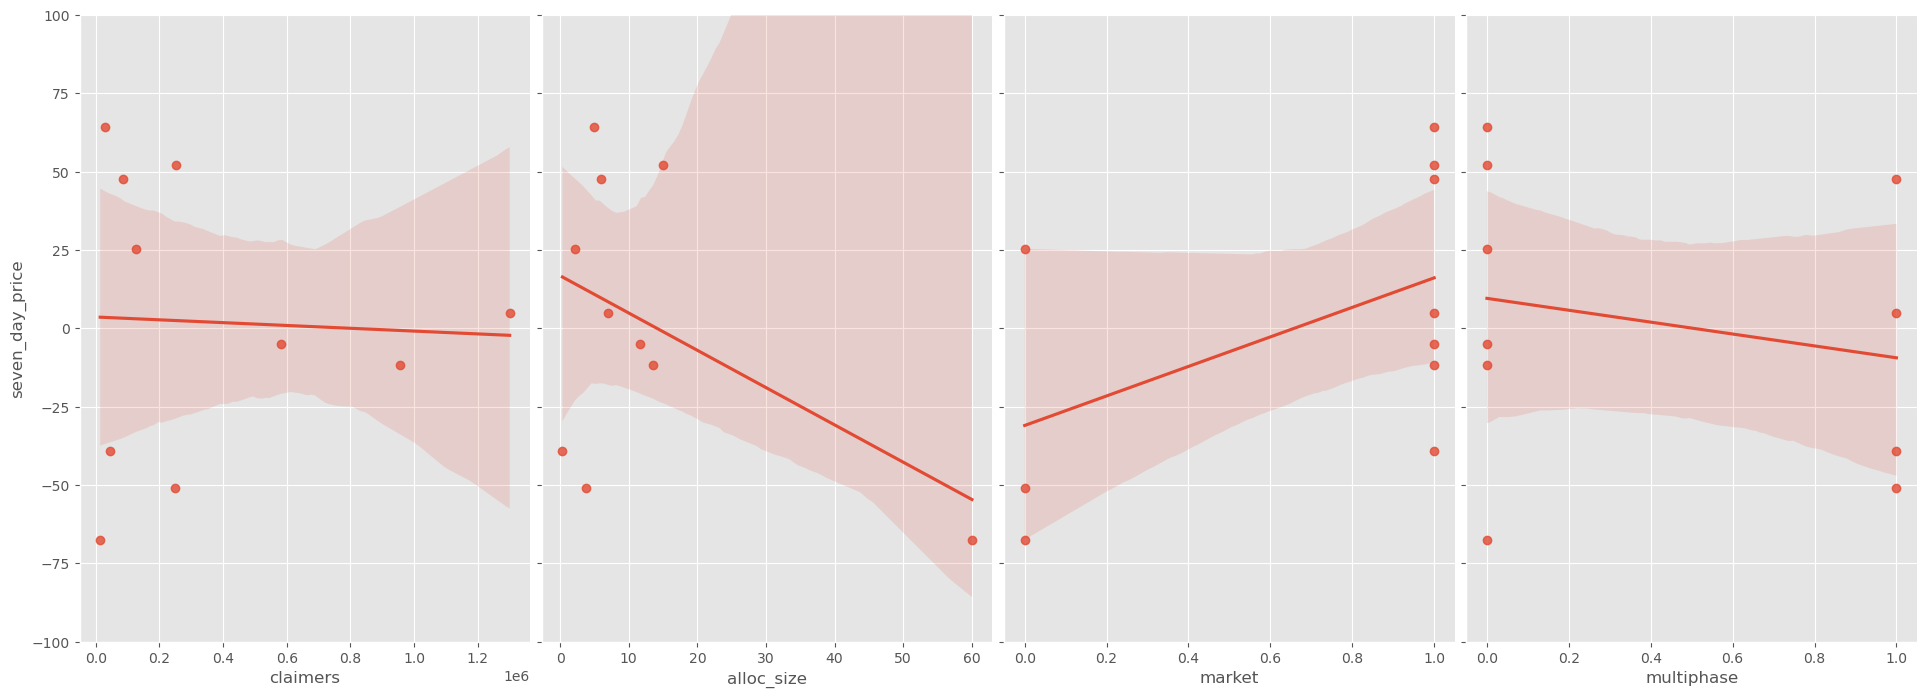

In [22]:
g = sns.pairplot(merged_df, x_vars=['claimers', 'alloc_size', 'market', 'multiphase'], y_vars='seven_day_price', height=7, aspect=0.7, kind='reg')
g.set(ylim=(-100 , 100))

c:\Users\pierr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


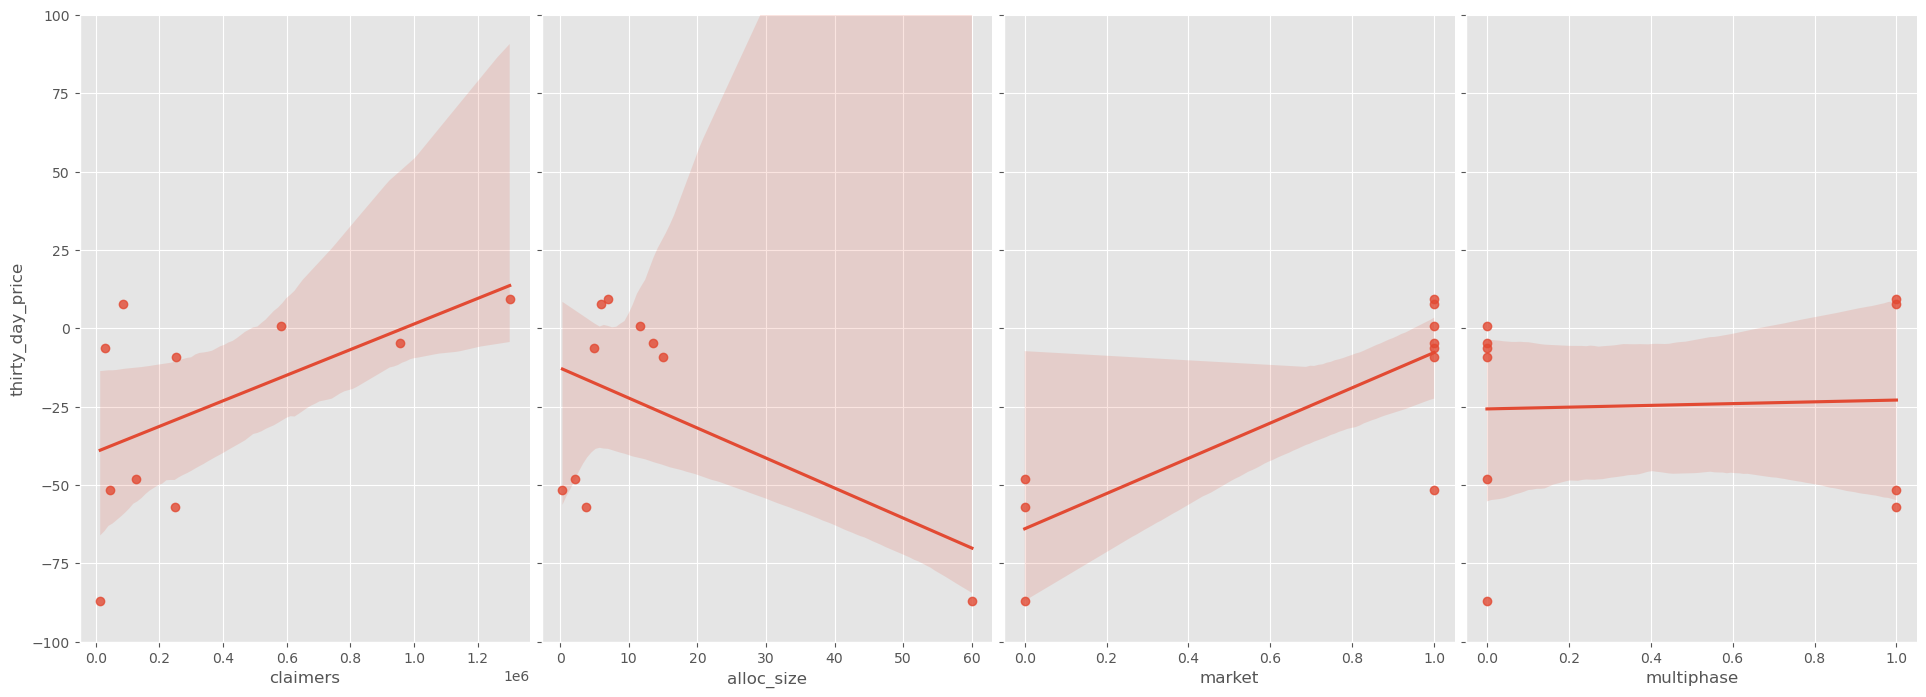

In [ ]:
g = sns.pairplot(merged_df, x_vars=['claimers', 'alloc_size', 'market', 'multiphase'], y_vars='thirty_day_price', height=7, aspect=0.7, kind='reg')
g.set(ylim=(-100 , 100))

c:\Users\pierr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


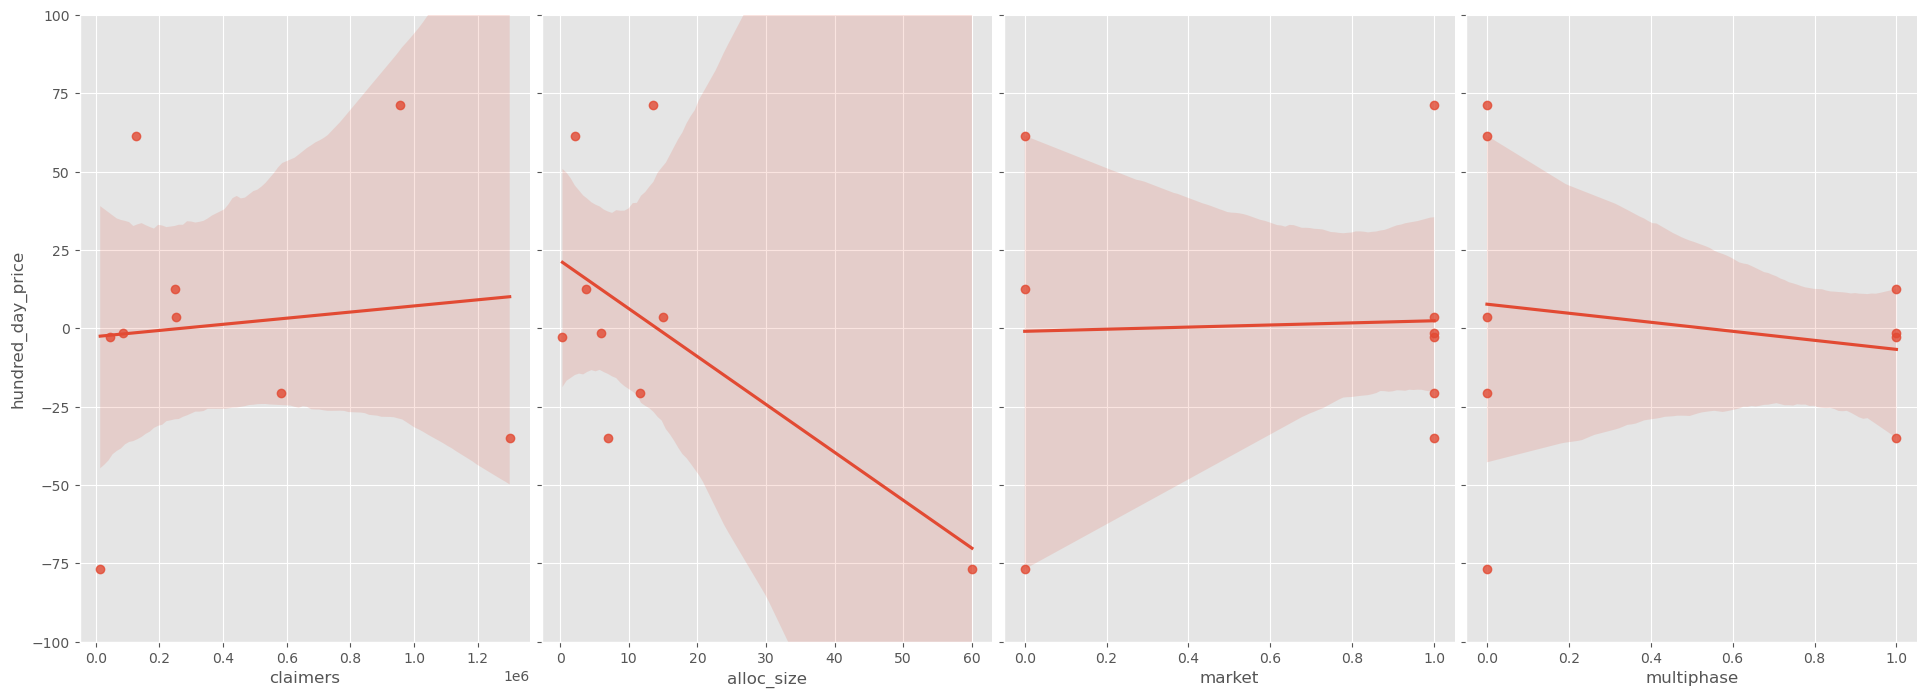

In [ ]:
g = sns.pairplot(merged_df, x_vars=['claimers', 'alloc_size', 'market', 'multiphase'], y_vars='hundred_day_price', height=7, aspect=0.7, kind='reg')
g.set(ylim=(-100 , 100))

## Regression

In [ ]:
from statsmodels.base.model import LikelihoodModel
from statsmodels.regression.linear_model import OLS
from statsmodels.multivariate.manova import MANOVA
from statsmodels.multivariate.multivariate_ols import _MultivariateOLS
import statsmodels.multivariate.tests.results as path
import os
dir_path = os.path.dirname(os.path.abspath(path.__file__))

In [ ]:
merged_df.head()

,date_x,claimers,alloc_size,market,multiphase,seven_day_tvl,thirty_day_tvl,hundred_day_tvl,date_y,seven_day_price,thirty_day_price,hundred_day_price,holder,top50,top100
Project,,,,,,,,,,,,,,,
1inch,2020-12-25,43717,5.57,1,1,NaN,NaN,NaN,2020-12-25 02:20:17,NaN,NaN,NaN,104958.0,77.65%,84.87%
arbitrum,2023-03-23,583138,11.62,1,0,6.795061,5.820428,2.871549,2023-03-23 14:01:26,-4.849065,0.701018,-20.823904,1226619.0,65.11%,77.85%
dydx-chain,2021-09-08,47136,15.37,1,0,11.168143,101.752359,170.277729,2023-10-31 09:13:09,NaN,NaN,NaN,55524.0,93.86%,95.83%
optimism,2022-05-31,248699,3.83,0,1,28.613792,6.383093,205.419462,2022-06-01 01:24:35,-51.017675,-57.037010,12.507271,1108028.0,81.49%,88.49%
uniswap,2020-09-16,252803,15.00,1,0,106.017945,211.869598,102.142041,2020-09-17 04:05:06,34.210636,-9.268136,3.426662,382284.0,73.84%,83.72%


In [ ]:
formula = "claimers + alloc_size + market + multiphase ~ seven_day_tvl"
mod = _MultivariateOLS.from_formula(formula, data=merged_df)
res = mod.fit()

In [ ]:
mvt = res.mv_test()
mvt.summary_frame

Value Num DF Den DF    F Value  \
Effect        Statistic                                                    
Intercept     Wilks' lambda            0.053774      4    8.0  35.192737   
              Pillai's trace           0.946226    4.0    8.0  35.192737   
              Hotelling-Lawley trace  17.596369      4    8.0  35.192737   
              Roy's greatest root     17.596369      4      8  35.192737   
seven_day_tvl Wilks' lambda            0.444255      4    8.0    2.50192   
              Pillai's trace           0.555745    4.0    8.0    2.50192   
              Hotelling-Lawley trace    1.25096      4    8.0    2.50192   
              Roy's greatest root       1.25096      4      8    2.50192   

                                        Pr > F  
Effect        Statistic                         
Intercept     Wilks' lambda            0.00004  
              Pillai's trace           0.00004  
              Hotelling-Lawley trace   0.00004  
              Roy's greatest root      0.00004  
seven_day_tvl Wilks' lambda           0.125541  
              Pillai's trace          0.125541  
              Hotelling-Lawley trace  0.125541  
              Roy's greatest root     0.125541

In [ ]:
manova = MANOVA.from_formula(formula, data=merged_df)
manova.mv_test().summary_frame

Value Num DF Den DF    F Value  \
Effect        Statistic                                                    
Intercept     Wilks' lambda            0.053774      4    8.0  35.192737   
              Pillai's trace           0.946226    4.0    8.0  35.192737   
              Hotelling-Lawley trace  17.596369      4    8.0  35.192737   
              Roy's greatest root     17.596369      4      8  35.192737   
seven_day_tvl Wilks' lambda            0.444255      4    8.0    2.50192   
              Pillai's trace           0.555745    4.0    8.0    2.50192   
              Hotelling-Lawley trace    1.25096      4    8.0    2.50192   
              Roy's greatest root       1.25096      4      8    2.50192   

                                        Pr > F  
Effect        Statistic                         
Intercept     Wilks' lambda            0.00004  
              Pillai's trace           0.00004  
              Hotelling-Lawley trace   0.00004  
              Roy's greatest root      0.00004  
seven_day_tvl Wilks' lambda           0.125541  
              Pillai's trace          0.125541  
              Hotelling-Lawley trace  0.125541  
              Roy's greatest root     0.125541

## Checking Regression Assumptions

### 1. Linearity

In [25]:
import statsmodels.api as sm


In [33]:
cleaned_df = merged_df.dropna(subset=['seven_day_tvl'])
model = sm.OLS(cleaned_df['seven_day_tvl'], sm.add_constant(cleaned_df[['claimers', 'alloc_size', 'market', 'multiphase']]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          seven_day_tvl   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     2.410
Date:                Mon, 22 Jul 2024   Prob (F-statistic):              0.135
Time:                        18:29:39   Log-Likelihood:                -79.036
No. Observations:                  13   AIC:                             168.1
Df Residuals:                       8   BIC:                             170.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        395.2271    114.429      3.454      0.0

c:\Users\pierr\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:
cleaned_df = merged_df.dropna(subset=['thirty_day_tvl'])
model = sm.OLS(cleaned_df['thirty_day_tvl'], sm.add_constant(cleaned_df[['claimers', 'alloc_size', 'market', 'multiphase']]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         thirty_day_tvl   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     2.031
Date:                Mon, 22 Jul 2024   Prob (F-statistic):              0.183
Time:                        18:29:16   Log-Likelihood:                -86.304
No. Observations:                  13   AIC:                             182.6
Df Residuals:                       8   BIC:                             185.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        622.6052    200.140      3.111      0.0

c:\Users\pierr\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [34]:
cleaned_df = merged_df.dropna(subset=['hundred_day_tvl'])
model = sm.OLS(cleaned_df['hundred_day_tvl'], sm.add_constant(cleaned_df[['claimers', 'alloc_size', 'market', 'multiphase']]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        hundred_day_tvl   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     3.356
Date:                Mon, 22 Jul 2024   Prob (F-statistic):             0.0682
Time:                        18:29:51   Log-Likelihood:                -89.851
No. Observations:                  13   AIC:                             189.7
Df Residuals:                       8   BIC:                             192.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1092.0682    262.923      4.154      0.0

c:\Users\pierr\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [35]:
cleaned_df = merged_df.dropna(subset=['seven_day_price'])
model = sm.OLS(cleaned_df['seven_day_price'], sm.add_constant(cleaned_df[['claimers', 'alloc_size', 'market', 'multiphase']]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        seven_day_price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     1.511
Date:                Mon, 22 Jul 2024   Prob (F-statistic):              0.327
Time:                        18:29:56   Log-Likelihood:                -47.860
No. Observations:                  10   AIC:                             105.7
Df Residuals:                       5   BIC:                             107.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1588     35.142      0.374      0.7

c:\Users\pierr\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [36]:
cleaned_df = merged_df.dropna(subset=['thirty_day_price'])
model = sm.OLS(cleaned_df['thirty_day_price'], sm.add_constant(cleaned_df[['claimers', 'alloc_size', 'market', 'multiphase']]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       thirty_day_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     8.208
Date:                Mon, 22 Jul 2024   Prob (F-statistic):             0.0201
Time:                        18:30:02   Log-Likelihood:                -38.988
No. Observations:                  10   AIC:                             87.98
Df Residuals:                       5   BIC:                             89.49
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.3817     14.485     -2.857      0.0

c:\Users\pierr\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [37]:
cleaned_df = merged_df.dropna(subset=['hundred_day_price'])
model = sm.OLS(cleaned_df['hundred_day_price'], sm.add_constant(cleaned_df[['claimers', 'alloc_size', 'market', 'multiphase']]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      hundred_day_price   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                 -0.565
Method:                 Least Squares   F-statistic:                    0.1875
Date:                Mon, 22 Jul 2024   Prob (F-statistic):              0.935
Time:                        18:30:06   Log-Likelihood:                -48.883
No. Observations:                  10   AIC:                             107.8
Df Residuals:                       5   BIC:                             109.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.4734     67.839      0.317      0.7

c:\Users\pierr\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
